## **In this homework, you can only use numpy! No Pytorch, no mxnet, no "autograd" of any kind. You must compute gradients yourself and implement all optimizers yourself from scratch.**

# Problem 1 (3 points)

Consider the following function:
$$f(x, y) = x^2 + 10y^2$$
A [contour plot](https://en.wikipedia.org/wiki/Contour_line) of this function is shown below.

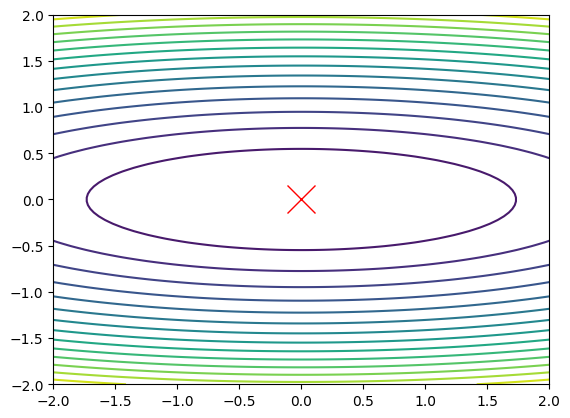

In [160]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

def plot_contour():
    x, y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
    plt.contour(x, y, x**2 + 10*y**2, levels=15)
    plt.plot(0, 0, 'rx', ms=20)
plot_contour()

As you can see, the minimum is at (0, 0), and the curve is much steeper in the y direction than in the x direction.

1. Minimize this function using gradient descent. Use the initial point $x = 2, y = 1$. Find one learning rate where optimization diverges and one "good" learning rate that reaches the minimum in at most 20 iterations. For your solution, you should plot the steps taken by your optimizer on top of the contour plot. If you have an array `x` and another `y` which represent the x and y values followed over the course of minimization, you can plot them on top of the contor plot by doing
```Python
plot_contour()
plt.plot(x, y, '-')
```

1. Show (via derivation through calculus, not through coding) that minimizing this function using [Newton's Method](http://d2l.ai/chapter_optimization/gd.html#newton-s-method) will converge to the minimum in a single step.

1. Minimize this function using the momentum optimizer. Set the momentum hyperparameter to $0.9$. Can you find a learning rate that allows momentum to converge in less than 20 steps? Now, try optimizing for 100 steps. What is the largest and smallest learning rate you can use when optimizing for 100 steps and still converge near the minumum?

1. Implement the Adam optimizer. Use the standard values for all hyperparameters $\beta_1 = 0.9, \beta_2 = 0.999, \epsilon = 10^{-6}, \eta = 0.001$. How many steps does it take for Adam to converge with these hyperparameters? Now, change $\eta$ to the largest value you found that worked for Momentum with 100 steps. Does Adam converge in 100 steps with this value of $\eta$?

### Answer 1

In [161]:
def gradient_descent_p1(x, y, lr, steps):
    x_values = [x]
    y_values = [y]
    for step in range(steps):
        x_der = 2*x
        y_der = 20*y
        x -= lr * x_der
        y -= lr * y_der
        x_values.append(x)
        y_values.append(y)
    return x_values, y_values

#### Utilizing a 'good' learning rate = 0.088 we get a minima $f(x, y)^* =  0.0019052187388784627$

f(x, y)* =  0.0019052187388784627


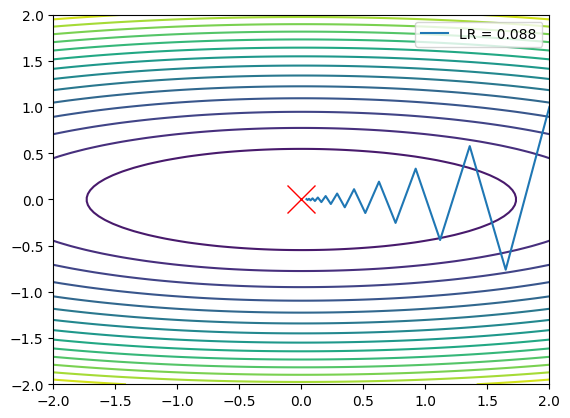

In [162]:
x, y = gradient_descent_p1(2, 1, 0.088, 20)
plot_contour()
plt.plot(x, y, '-', label = 'LR = 0.088')
plt.legend()
print('f(x, y)* = ',x[-1]**2 + 10*y[-1]**2 )

#### Utilizing a 'bad' learning rate = 0.11 the optimization diverges

f(x, y)* =  89.36386392318906


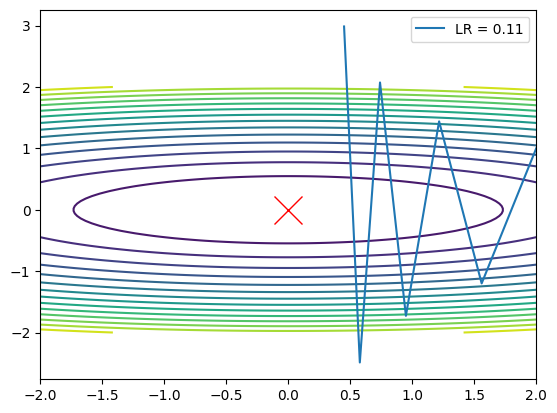

In [163]:
x, y = gradient_descent_p1(2, 1, 0.11, 6)
plot_contour()
plt.plot(x, y, '-', label = 'LR = 0.11')
plt.legend()
print('f(x, y)* = ',x[-1]**2 + 10*y[-1]**2 )

### Answer 2

For the given function we have $H = [[2,0],[0, 20]]$ and $H^{-1} = [[\frac{1}{2},0],[0,\frac{1}{20}]$. Since $ \epsilon = -H^{-1}\nabla f(x,y)$, we obtain $\epsilon_x = -x$ and $\epsilon_y = -y$, $\forall x,y$. Therefore, one single step is needed to reach the global minima.

### Answer 3

In [164]:
def gradient_descent_momentum_p1(x_i, y_i, lr, steps, beta = 0.9):
    x = x_i
    y = y_i
    x_values = [x_i]
    y_values = [y_i]
    V_t_x = 0
    V_t_y = 0
    for step in range(steps):
        x_der = 2*x
        y_der = 20*y
        V_t_x = (beta * V_t_x) + x_der
        V_t_y = (beta * V_t_y) + y_der
        x = x - lr * V_t_x
        y = y - lr * V_t_y
        x_values.append(x)
        y_values.append(y)
    return x_values, y_values

#### 20 steps
The momentum optimizer is not able to minimize the function under 20 steps for `beta= 0.9`. Two learning rates, `large=0.03` and `small = 0.004`, can be seen in the plot.

Large LR :f(x, y)* =  0.4625020080660793
Small LR :f(x, y)* =  1.0863143550898324


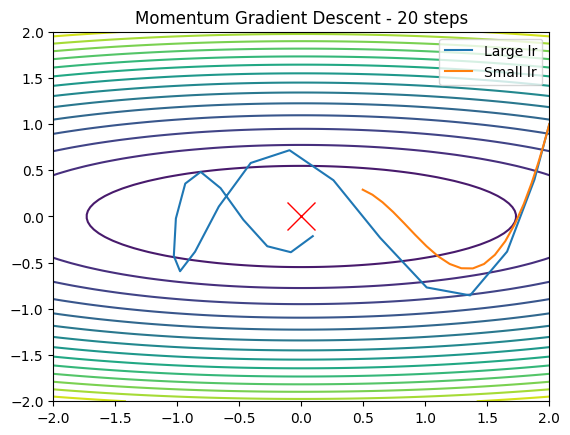

In [165]:
# run momentum optimizer
x_mom_large_lr, y_mom_large_lr = gradient_descent_momentum_p1(2, 1, 0.03, 20)
x_mom_small_lr, y_mom_small_lr = gradient_descent_momentum_p1(2, 1, 0.004, 20)
#plot values
plot_contour()
plt.title('Momentum Gradient Descent - 20 steps')
plt.plot(x_mom_large_lr, y_mom_large_lr, '-',label ='Large lr')
plt.plot(x_mom_small_lr, y_mom_small_lr, '-',label ='Small lr')
plt.legend()
print('Large LR :f(x, y)* = ',x_mom_large_lr[-1]**2 + 10*y_mom_large_lr[-1]**2 )
print('Small LR :f(x, y)* = ',x_mom_small_lr[-1]**2 + 10*y_mom_small_lr[-1]**2 )

#### 100 steps
The momentum optimizer successfully minimizes the function under 100 steps for `beta= 0.9`. The curves for the largest and smallest learning rates, `large=0.13` and `small = 0.004`, can be seen in the plot.

Large LR :f(x, y)* =  0.00028209417949283074
Small LR :f(x, y)* =  0.00032870577120611534


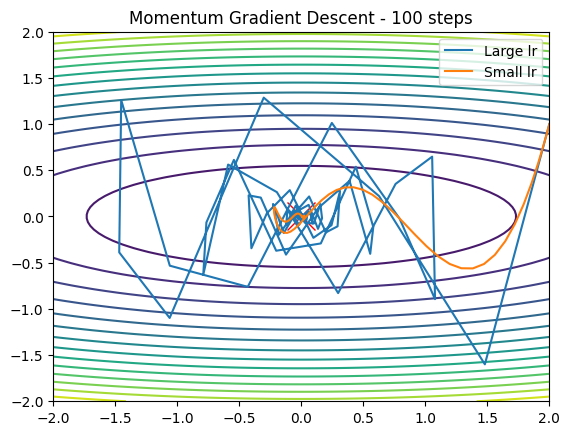

In [166]:
# run momentum optimizer
x_mom_large_lr, y_mom_large_lr = gradient_descent_momentum_p1(2, 1, 0.13, 100)
x_mom_small_lr, y_mom_small_lr = gradient_descent_momentum_p1(2, 1, 0.004, 100)
#plot values
plot_contour()
plt.title('Momentum Gradient Descent - 100 steps')
plt.plot(x_mom_large_lr, y_mom_large_lr, '-',label ='Large lr')
plt.plot(x_mom_small_lr, y_mom_small_lr, '-',label ='Small lr')
plt.legend()
print('Large LR :f(x, y)* = ',x_mom_large_lr[-1]**2 + 10*y_mom_large_lr[-1]**2 )
print('Small LR :f(x, y)* = ',x_mom_small_lr[-1]**2 + 10*y_mom_small_lr[-1]**2 )

### Answer 4
With the standard parameters β1=0.9, β2=0.999,ϵ=10−6, and η=0.001, Adam converges to the minima around 4000 steps.

In [167]:
def gradient_descent_adam_p1(x, y, steps, lr = 0.001, beta_1 = 0.9, beta_2 = 0.999, e = 10e-8):
    x_values = [x]
    y_values = [y]
    V_t_x = 0
    V_t_y = 0
    S_t_y = 0
    S_t_x = 0
    for step in range(1, steps+1):
        x_der = 2*x
        y_der = 20*y
        #compute first momentum and correct bias
        V_t_x = beta_1* V_t_x + (1 -  beta_1) * x_der
        V_t_y = beta_1 * V_t_y + (1 - beta_1) * y_der

        V_t_x_norm = V_t_x / (1 - beta_1**step)
        V_t_y_norm = V_t_y / (1 - beta_1**step)

        #compute second momentum and correct bias
        S_t_x = beta_2 * S_t_x + (1 - beta_2) * (x_der**2)
        S_t_y = beta_2 * S_t_y + (1 - beta_2) * (y_der**2)

        S_t_x_norm = S_t_x / (1 - beta_2**step)
        S_t_y_norm = S_t_y / (1 - beta_2**step)

        #Compute g_prime
        g_prime_x = (lr * V_t_x_norm) / (math.sqrt(S_t_x_norm) + e)
        g_prime_y = (lr * V_t_y_norm) / (math.sqrt(S_t_y_norm) + e)

        #apply g_prime
        x -= g_prime_x
        y -= g_prime_y
        x_values.append(x)
        y_values.append(y)
    return x_values, y_values

Large LR :f(x, y)* =  0.00026194237564240627


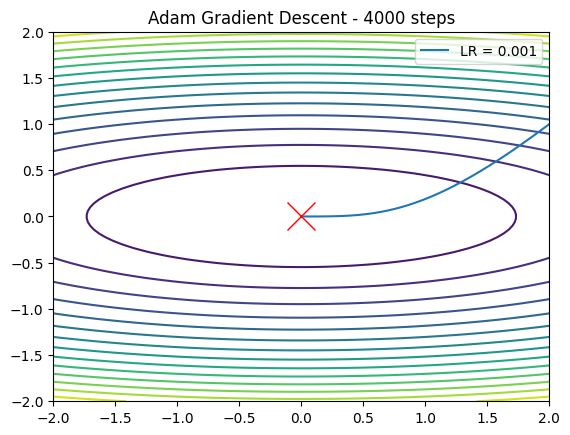

In [168]:
# run adam optimizer
x_adam, y_adam = gradient_descent_adam_p1(2, 1, 4000)

#plot values
plot_contour()
plt.title('Adam Gradient Descent - 4000 steps')
plt.plot(x_adam, y_adam, '-',label ='LR = 0.001')
plt.legend()
print('Large LR :f(x, y)* = ',x_adam[-1]**2 + 10*y_adam[-1]**2 )
#print('Small LR :f(x, y)* = ',x_adam_small_lr[-1]**2 + 10*y_adam_small_lr[-1]**2 )

By modifying the learning rate to being the same as the largest one that worked with the momentum optimizer, Adam also converges under 100 steps

Large LR :f(x, y)* =  0.00026984895788501734


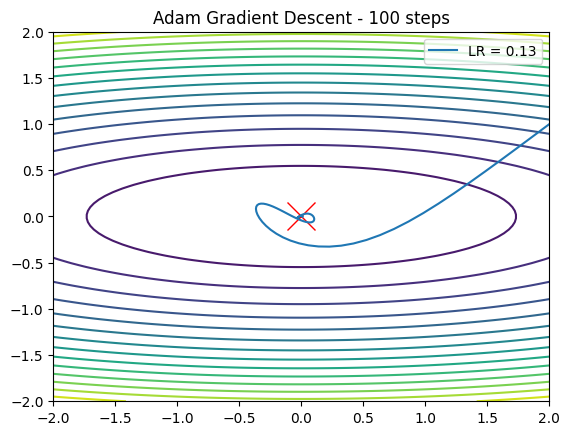

In [169]:
# run adam optimizer
x_adam, y_adam = gradient_descent_adam_p1(2, 1, 100, lr = 0.13)

#plot values
plot_contour()
plt.title('Adam Gradient Descent - 100 steps')
plt.plot(x_adam, y_adam, '-',label ='LR = 0.13')
plt.legend()
print('Large LR :f(x, y)* = ',x_adam[-1]**2 + 10*y_adam[-1]**2 )
#print('Small LR :f(x, y)* = ',x_adam_small_lr[-1]**2 + 10*y_adam_small_lr[-1]**2 )

# Problem 2 (2 points)

Now, consider minimization of the ["three-hump camel function"](https://www.sfu.ca/~ssurjano/camel3.html):

$$f(x, y) = 2x^2 - 1.05x^4 + \frac{x^6}{6} + xy + y^2$$

This function also has a minimum at $(0, 0)$. Below is a contour plot.

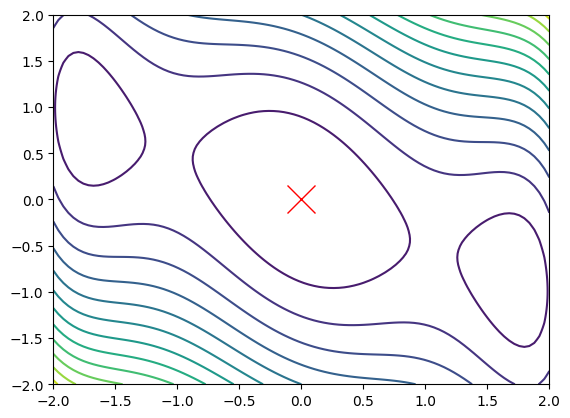

In [170]:
def plot_contour():
    x, y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
    plt.contour(x, y, 2*x**2 - 1.05*x**4 + x**6/6 + x*y + y**2, levels=15)
    plt.plot(0, 0, 'rx', ms=20)
plot_contour()

As in the first problem, assume that optimization starts from $x = 2, y = 1$. Try minimizing it with SGD, Adam, and Momentum, while only changing the learning rate for each (not the momentum or other hyperparameters). Try to find an optimizer and learning rate that can reach the **global** minimum in as few steps as possible.

### Answer
After multiple experiments, the learning rate values bellow were the ones that yielded the fastest convergence for each optimizer. Among the three optimzers tested, SGD was the one to converge faster.

 #### SGD
 With `lr = 0.247`, SGD converges in `steps = 4`.

f(x, y)* =  0.0001357122821910674


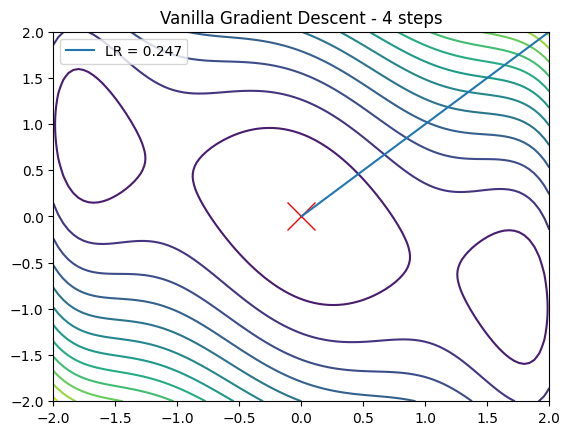

In [171]:
def gradient_descent_2(x, y,lr , steps):
    x_values = [x]
    y_values = [y]
    for step in range(steps):
        x_der = 4*x - 4.20 * x**3 + x**5 + y
        y_der = 2*y + x
        x -= lr * x_der
        y -= lr * y_der
        x_values.append(x)
        y_values.append(y)
    return x_values, y_values

x_2, y_2 = gradient_descent_2(2, 1, 0.247, 4)
plot_contour()
plt.title('Vanilla Gradient Descent - 4 steps')
plt.plot(x_2, x_2, '-',label = 'LR = 0.247')
plt.legend()
print('f(x, y)* = ',2*x_2[-1]**2 - 1.05*y_2[-1]**4 + (x_2[-1]**6)/6 + x_2[-1]*y_2[-1] + y_2[-1]**2)

 #### Momentum
 With `lr = 0.03`, Momentum converges in `steps = 75`.

f(x, y)* =  0.00010941716507997417


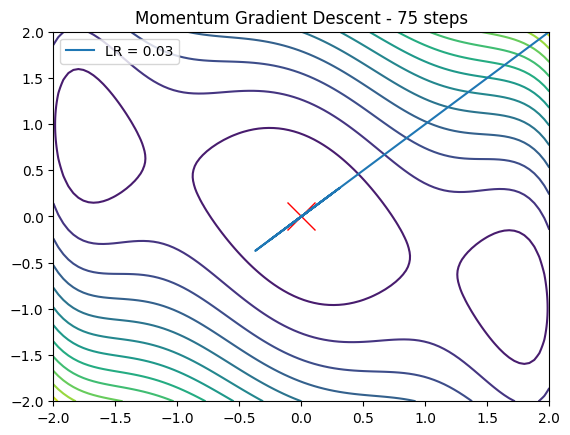

In [172]:
def gradient_descent_momentum_p2(x, y, lr, steps, beta = 0.9):
    x_values = [x]
    y_values = [y]
    V_t_x = 0
    V_t_y = 0
    for step in range(steps):
        x_der = 4*x - 4.20 * x**3 + x**5 + y
        y_der = 2*y + x
        V_t_x = (beta * V_t_x) + x_der
        V_t_y = (beta * V_t_y) + y_der
        x = x - lr * V_t_x
        y = y - lr * V_t_y
        x_values.append(x)
        y_values.append(y)
    return x_values, y_values

x_2, y_2 = gradient_descent_momentum_p2(2, 1, 0.03, 75)
plot_contour()
plt.title('Momentum Gradient Descent - 75 steps')
plt.plot(x_2, x_2, '-',label = 'LR = 0.03')
plt.legend()

print('f(x, y)* = ',2*x_2[-1]**2 - 1.05*y_2[-1]**4 + (x_2[-1]**6)/6 + x_2[-1]*y_2[-1] + y_2[-1]**2)

 #### Adam
 With `lr = 0.575`, Adam converges in `steps = 80`.

f(x, y)* =  0.0001702876538763739


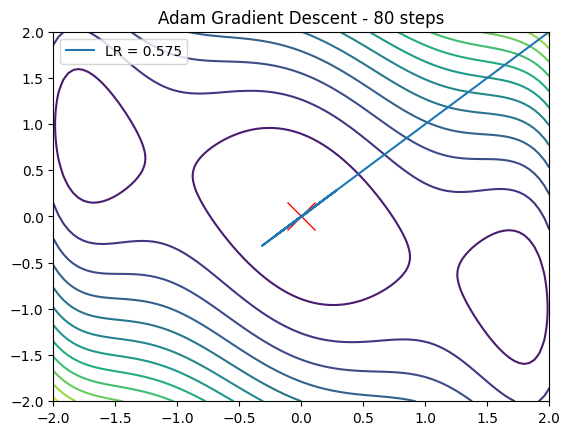

In [173]:
def gradient_descent_adam_p2(x, y, steps, lr = 0.001, beta_1 = 0.9, beta_2 = 0.999, e = 10e-8):
    x_values = [x]
    y_values = [y]
    V_t_x = 0
    V_t_y = 0
    S_t_y = 0
    S_t_x = 0
    for step in range(1, steps+1):
        x_der = 4*x - 4.20 * x**3 + x**5 + y
        y_der = 2*y + x
        #compute first momentum and correct bias
        V_t_x = beta_1* V_t_x + (1 -  beta_1) * x_der
        V_t_y = beta_1 * V_t_y + (1 - beta_1) * y_der

        V_t_x_norm = V_t_x / (1 - beta_1**step)
        V_t_y_norm = V_t_y / (1 - beta_1**step)

        #compute second momentum and correct bias
        S_t_x = beta_2 * S_t_x + (1 - beta_2) * (x_der**2)
        S_t_y = beta_2 * S_t_y + (1 - beta_2) * (y_der**2)

        S_t_x_norm = S_t_x / (1 - beta_2**step)
        S_t_y_norm = S_t_y / (1 - beta_2**step)

        #Compute g_prime
        g_prime_x = (lr * V_t_x_norm) / (math.sqrt(S_t_x_norm) + e)
        g_prime_y = (lr * V_t_y_norm) / (math.sqrt(S_t_y_norm) + e)

        #apply g_prime
        x -= g_prime_x
        y -= g_prime_y
        x_values.append(x)
        y_values.append(y)
    return x_values, y_values

x_2, y_2 = gradient_descent_adam_p2(2, 1, 80, lr = 0.575)
plot_contour()
plt.title('Adam Gradient Descent - 80 steps')
plt.plot(x_2, x_2, '-',label = 'LR = 0.575')
plt.legend()
print('f(x, y)* = ', 2*x_2[-1]**2 - 1.05*y_2[-1]**4 + (x_2[-1]**6)/6 + x_2[-1]*y_2[-1] + y_2[-1]**2)